# Modelling

Modelling Steps, using two Stages

Stage 1: We model the Claim Frequency / Claim Incidence

Stage 2: We model the Average Claim Amount  

in the end we combine the predictions of the two Stages by multiypling them (similar to P(Default) x E(LGD) models in Basel 2 Framework)

## 1. Data Import

Original code here: [001-Data_Import.R](../code/001-Data_Import.R)

In [2]:
source('../trunk/progs/001-Data_Import.R')

Lade nötiges Paket: farff

Parse with reader=readr : ../trunk/data/freMTPL2freq.arff

Lade nötiges Paket: readr

header: 0.025000; preproc: 0.348000; data: 0.650000; postproc: 0.035000; total: 1.058000

Parse with reader=readr : ../trunk/data/freMTPL2sev.arff

header: 0.001000; preproc: 0.007000; data: 0.011000; postproc: 0.000000; total: 0.019000



## 2. Feature Engineering and Data Preparation Steps

Original code here: [002-FeatEng_Prep.R](../code/002-FeatEng_Prep.R)

In [3]:
source('../trunk/progs/002-FeatEng_Prep.R')

## 3. Data Split

Here we Split it 80%, 10%, 10%, so that we have a training set to train the models in both Stages,
then test to validate the models on the Stages, and a validation for when we have the final 
results

Original code here: [003-Data_Split.R](../code/003-Data_Split.R)


In [4]:
source('../trunk/progs/003-Data_Split.R')

Lade nötiges Paket: caret

Lade nötiges Paket: ggplot2

Lade nötiges Paket: lattice



In [5]:
str(m2_train)

'data.frame':	542411 obs. of  16 variables:
 $ IDpol     : num  1 3 5 10 11 15 17 18 21 27 ...
 $ ClaimNb   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Exposure  : num  0.1 0.77 0.75 0.09 0.84 0.45 0.27 0.71 0.15 0.87 ...
 $ Area      : Factor w/ 6 levels "A","B","C","D",..: 4 4 2 2 2 5 3 3 2 3 ...
 $ VehPower  : Factor w/ 6 levels "4","5","6","7",..: 2 2 3 4 4 3 4 4 4 4 ...
 $ VehAge    : Ord.factor w/ 5 levels "[0,2]"<"(2,5]"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DrivAge   : Ord.factor w/ 5 levels "[18,25]"<"(25,35]"<..: 4 4 4 4 4 3 2 2 3 5 ...
 $ BonusMalus: int  50 50 50 50 50 50 68 68 50 50 ...
 $ VehBrand  : Factor w/ 11 levels "B1","B10","B11",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ VehGas    : Factor w/ 2 levels "Diesel","Regular": 2 2 1 1 1 2 1 1 1 1 ...
 $ Density   : Ord.factor w/ 5 levels "[0,100]"<"(100,200]"<..: 5 5 1 1 1 5 2 2 1 2 ...
 $ Region    : Factor w/ 22 levels "R11","R21","R22",..: 18 18 3 15 15 8 20 20 12 21 ...
 $ Claim     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ sumClaims : num  NA NA NA NA

# Model Stage 1

## Classifier
We will train a classifier first (logistic regression). To see how well we
can identify contracts with Claims


In [7]:
glm1 <- glm(Claim ~ VehPower + VehAge + DrivAge + BonusMalus
                        + VehBrand + VehGas + Density + Region + Area,
                data=m2_train, offset=log(Exposure), family=binomial())


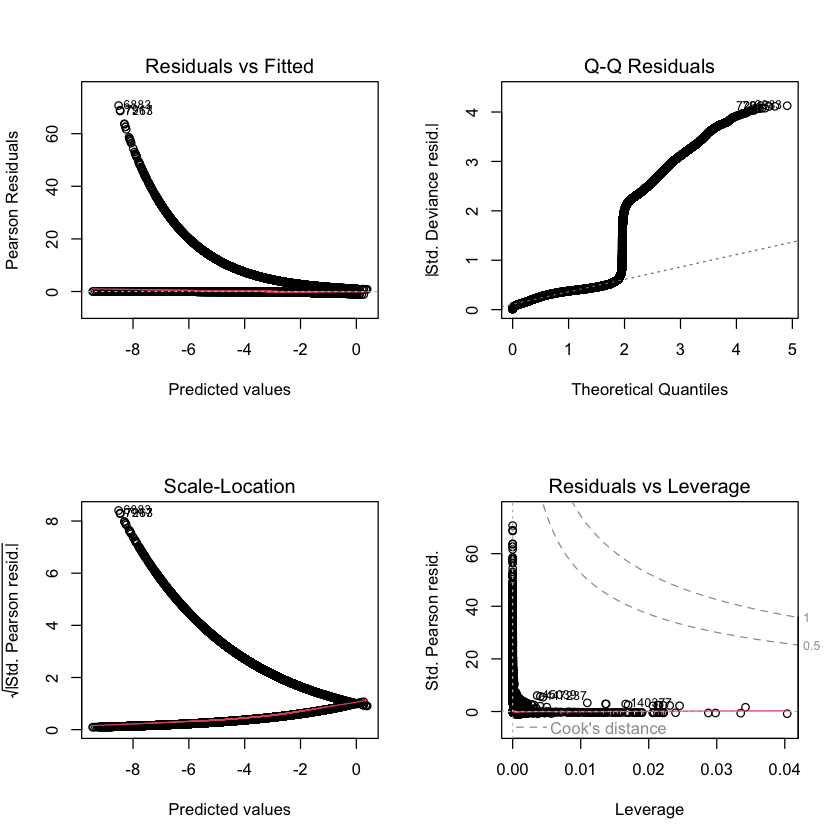

In [70]:
par(mfrow=c(2,2))
plot(glm1)

In [8]:
summary(glm1)


Call:
glm(formula = Claim ~ VehPower + VehAge + DrivAge + BonusMalus + 
    VehBrand + VehGas + Density + Region + Area, family = binomial(), 
    data = m2_train, offset = log(Exposure))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.8813042  0.3446758 -14.162  < 2e-16 ***
VehPower5      0.1957827  0.0219062   8.937  < 2e-16 ***
VehPower6      0.2083687  0.0218361   9.542  < 2e-16 ***
VehPower7      0.1347867  0.0215077   6.267 3.68e-10 ***
VehPower8     -0.0740735  0.0325252  -2.277 0.022761 *  
VehPower9      0.2325183  0.0240748   9.658  < 2e-16 ***
VehAge.L      -0.5157825  0.0212045 -24.324  < 2e-16 ***
VehAge.Q      -0.0134003  0.0181205  -0.740 0.459598    
VehAge.C      -0.1573222  0.0160124  -9.825  < 2e-16 ***
VehAge^4       0.0966439  0.0136223   7.095 1.30e-12 ***
DrivAge.L      0.2699843  0.0217537  12.411  < 2e-16 ***
DrivAge.Q     -0.0135930  0.0174959  -0.777 0.437204    
DrivAge.C     -0.2162585  0.0148007 -14.611  < 2e-16 **

## Evaluation of Results Based on Classifier Metrics



In [9]:
source('../trunk/progs/util_funcs.R')
glm1_pred <- predict(glm1, newdata=m2_test, type="response")
evalCut(glm1_pred, m2_test$Claim,0.06)

1900,1596
23228,41076


Results are not very impressive - we end up with a high false positive rate, whereas the data we have maybe do not offer enough features to achieve a much greater separation. Without a greater reference to compare, we are at least better than a coin flip, considering tpr/tnr.

The model itself is indeed showing lots of significant features, at least we know that some of the variation is being captured by our model. They seem also to be in the correct direction (for example Higher Bonus Malus higher chance of Claim). 

Let's consider a model that would predict the Number of Claims instead, so we use more of the data structure we have available.


## Poisson Regression

In [10]:
glm2 <- glm(ClaimNb ~ VehPower + VehAge + DrivAge + BonusMalus
                        + VehBrand + VehGas + Density + Region + Area,
                data=m2_train, offset=log(Exposure), family=poisson())

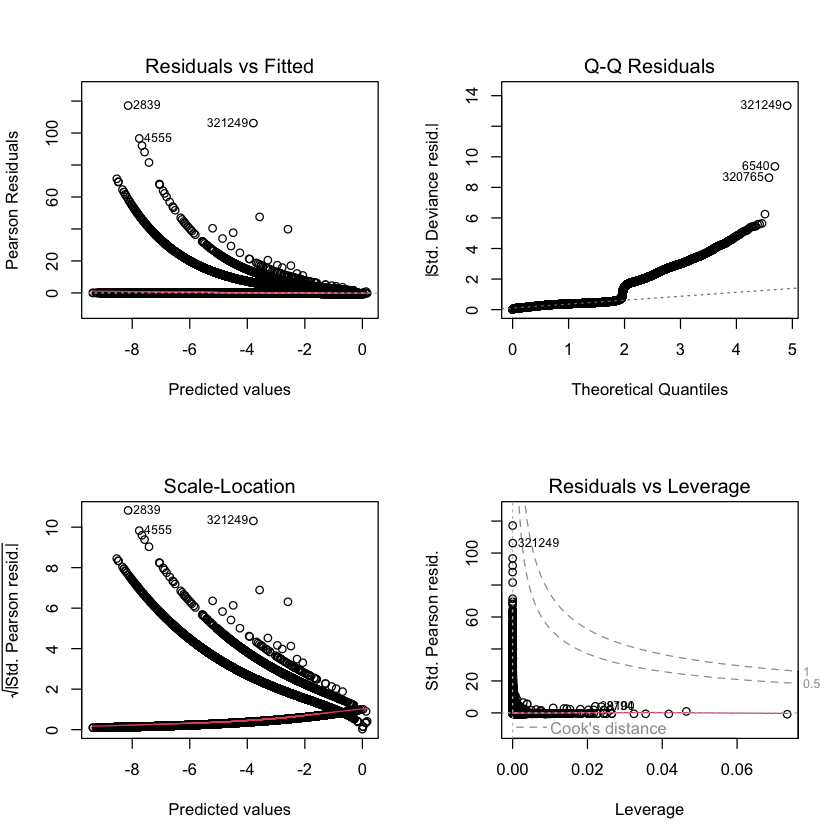

In [74]:
par(mfrow=c(2,2))
plot(glm2)

In [11]:
summary(glm2)


Call:
glm(formula = ClaimNb ~ VehPower + VehAge + DrivAge + BonusMalus + 
    VehBrand + VehGas + Density + Region + Area, family = poisson(), 
    data = m2_train, offset = log(Exposure))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.7269076  0.3166401 -14.928  < 2e-16 ***
VehPower5      0.1755779  0.0203326   8.635  < 2e-16 ***
VehPower6      0.1838242  0.0203089   9.051  < 2e-16 ***
VehPower7      0.1209445  0.0200286   6.039 1.55e-09 ***
VehPower8     -0.0770517  0.0305004  -2.526 0.011529 *  
VehPower9      0.2096426  0.0223905   9.363  < 2e-16 ***
VehAge.L      -0.4822449  0.0199565 -24.165  < 2e-16 ***
VehAge.Q      -0.0177665  0.0170613  -1.041 0.297720    
VehAge.C      -0.1473929  0.0150301  -9.806  < 2e-16 ***
VehAge^4       0.0909640  0.0127178   7.153 8.52e-13 ***
DrivAge.L      0.2299728  0.0196407  11.709  < 2e-16 ***
DrivAge.Q      0.0045702  0.0159905   0.286 0.775027    
DrivAge.C     -0.2061898  0.0137015 -15.049  < 2e-16 *

The model itself doesn't show big red flags again. We are indeed still significant at all features - which is not completely absurd since we are using the same Exposure offset and a similar model structure. Let's see if on the Classifier Metrics there is any improvement


## Evaluation of Results Based on Classifier Metrics



In [12]:
glm2_pred <- predict(glm2, newdata=m2_test, type='response')
evalCut(glm2_pred, m2_test$Claim,0.059)

1994,1502
25493,38811


We achieve a slightly better TPR, whereas TNR is a bit worse, as well as slightly worse F1score. I would still choose this model at this stage given that we identify almost 100 more True Positives, than in the classifier.

Another reason to use the Poisson model is that the expected value obtained via the predict() method allows us to estimate the expected number of Claims, which will be useful after we Finish Stage 1 and 2 and integrate both models

In [77]:
summary(glm2_pred)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000089 0.017344 0.047702 0.053520 0.076865 0.840913 

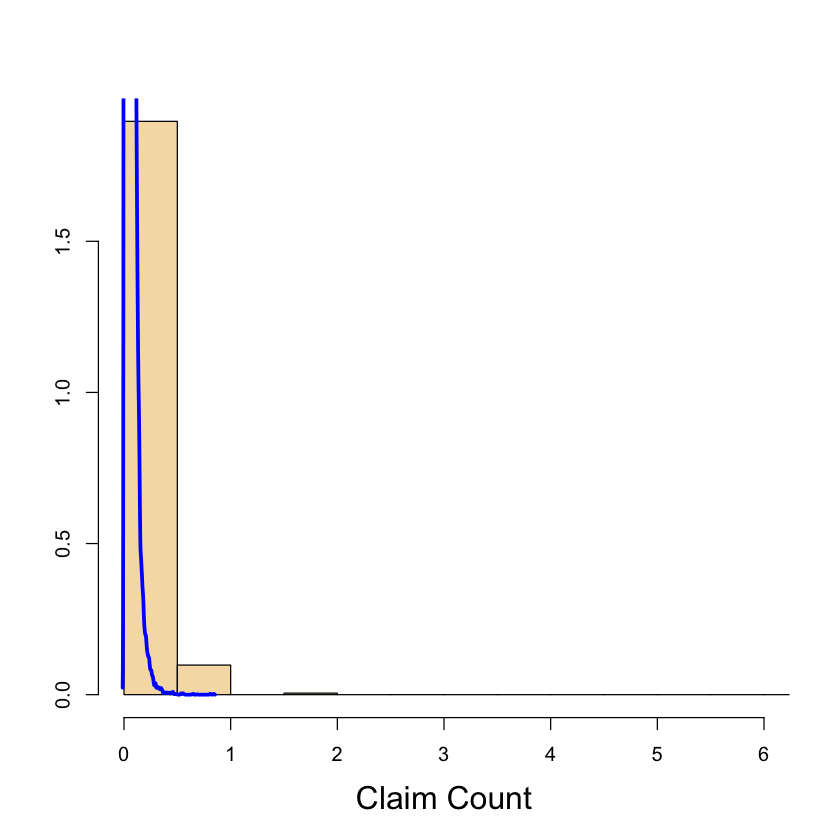

In [13]:
 hist(m2_test$ClaimNb,prob =TRUE, main = '', ylab = '', xlim =c(0, 6) , col = 'wheat', xlab = 'Claim Count', cex.lab = 1.6)
 lines(density(glm2_pred),col = 'blue', lwd = 3)

## Graphical Display of the Coefficients

In order to graphically summarise the model coefficientes we built a function that takes
the glm model and plots the exponentied coefficients (minus intercept) for the significant coefficients.

Original code here: [util_funcs.R](../code/util_funcs.R)

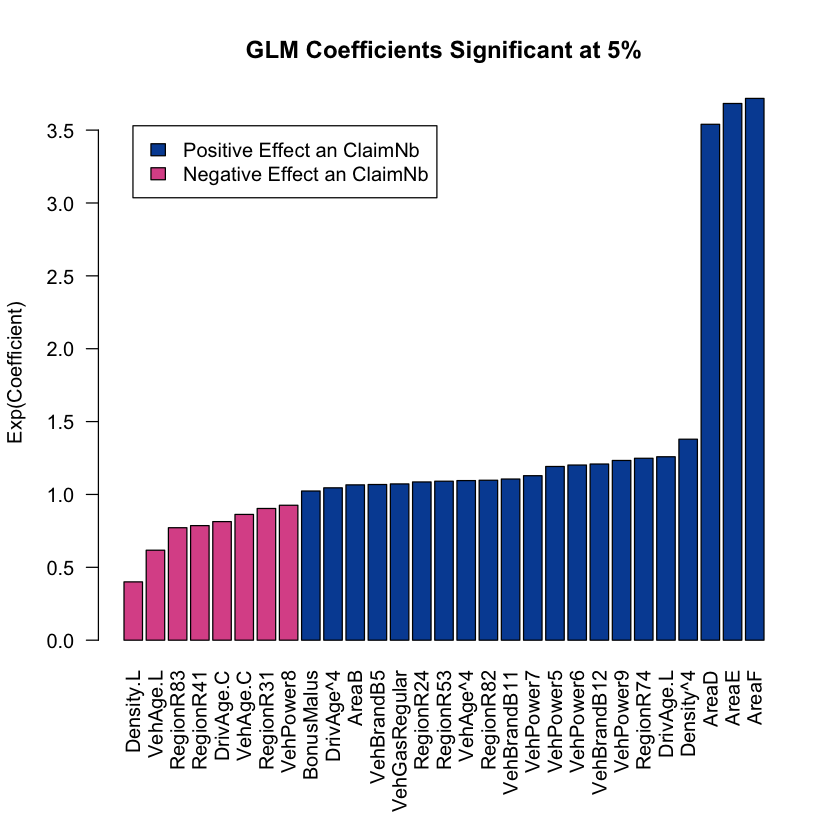

In [14]:
source('../trunk/progs/util_funcs.R')
plot_exp_coeffs(glm2,target = 'ClaimNb')

# Model Stage 2

Based on EDA we decided to try a Gamma model with log link, to take in account skewedness in the distribution of target and dispersion

## GLM Gamma 

In [80]:
glmc1 <- glm(target ~ VehPower + VehAge + DrivAge + BonusMalus
      + VehBrand + VehGas + Density + Region + Area,
                family=Gamma(link="log"), data=cm2_train)

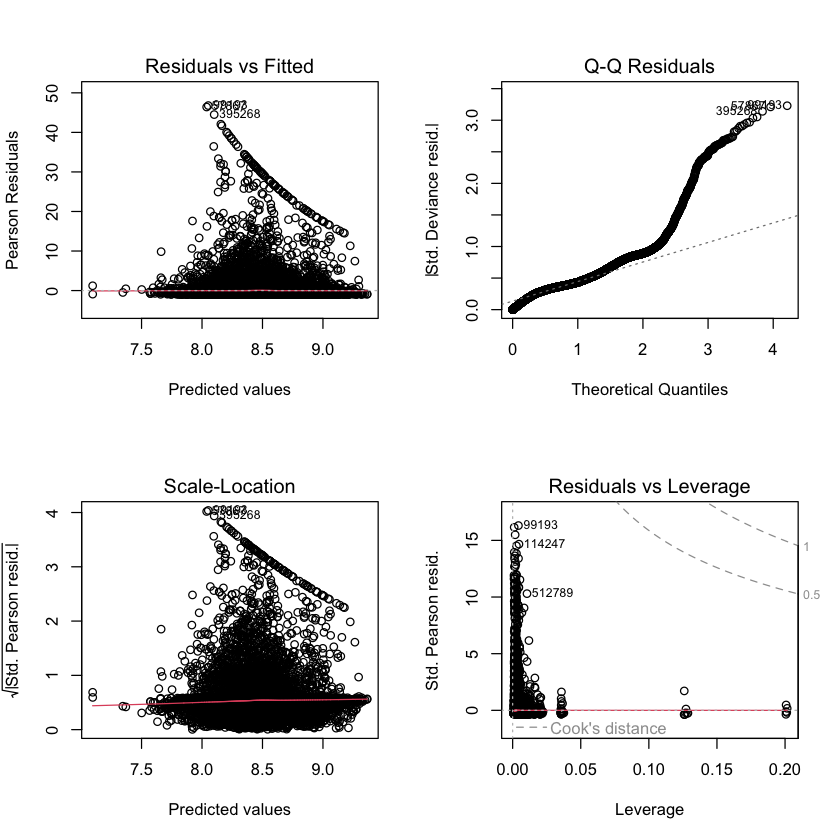

In [81]:
par(mfrow=c(2,2))
plot(glmc1)

In [82]:
summary(glmc1)


Call:
glm(formula = target ~ VehPower + VehAge + DrivAge + BonusMalus + 
    VehBrand + VehGas + Density + Region + Area, family = Gamma(link = "log"), 
    data = cm2_train)

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.848430   0.977111   9.056  < 2e-16 ***
VehPower5     -0.089715   0.072324  -1.240   0.2148    
VehPower6     -0.050268   0.071019  -0.708   0.4791    
VehPower7     -0.037147   0.070115  -0.530   0.5963    
VehPower8     -0.055052   0.100411  -0.548   0.5835    
VehPower9      0.020393   0.078518   0.260   0.7951    
VehAge.L       0.073651   0.065890   1.118   0.2637    
VehAge.Q       0.066610   0.056788   1.173   0.2408    
VehAge.C       0.009397   0.049317   0.191   0.8489    
VehAge^4       0.022527   0.041604   0.541   0.5882    
DrivAge.L     -0.479076   0.067123  -7.137 9.84e-13 ***
DrivAge.Q      0.096864   0.054657   1.772   0.0764 .  
DrivAge.C     -0.103151   0.046657  -2.211   0.0271 *  
DrivAge^4     -0.077482  

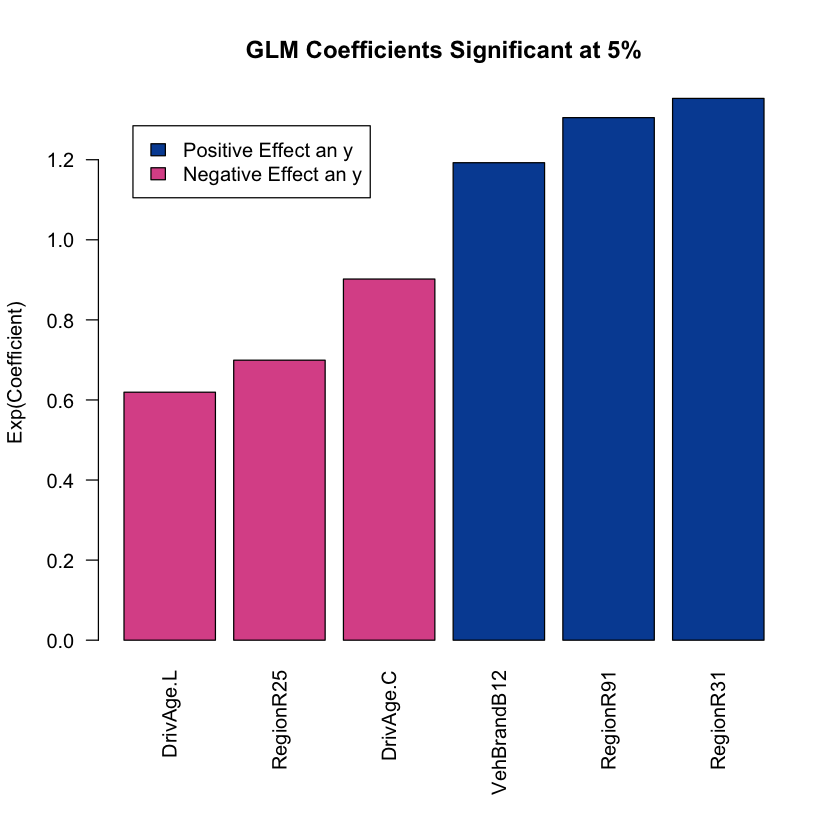

In [83]:
source('../trunk/progs/util_funcs.R')
plot_exp_coeffs(glmc1,target = 'y', dist = 't' , alpha.cutoff = 0.05)

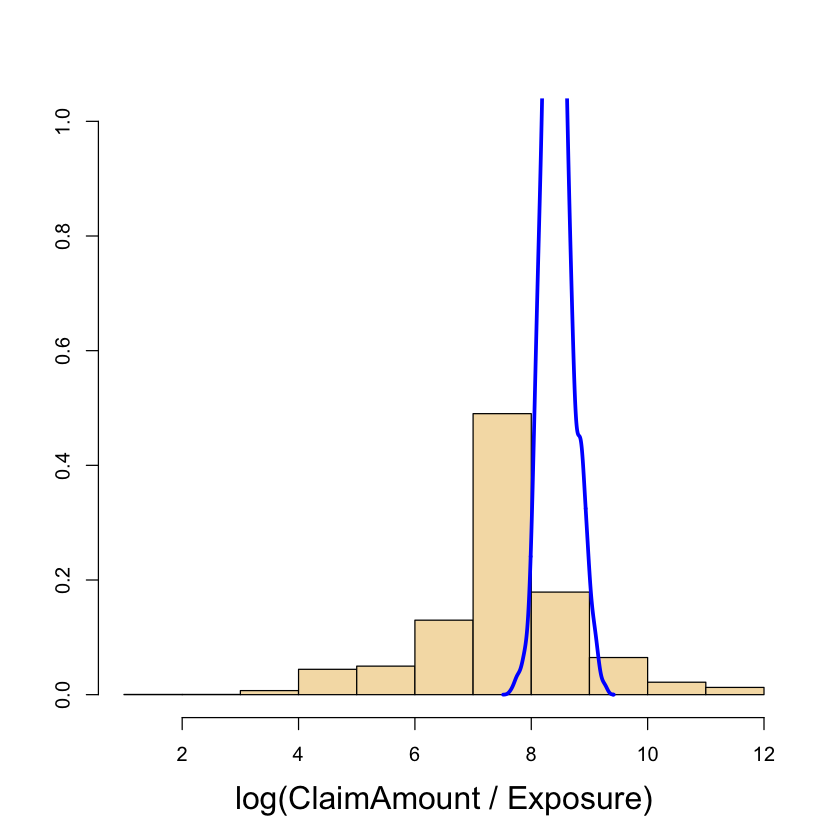

In [84]:
       glmc1_pred <- predict(glmc1, newdata=cm2_test, type="response")
        hist(log(cm2_test$target),prob =TRUE, main = '', ylim = c(0,1) , ylab = '', col = 'wheat', xlab = 'log(ClaimAmount / Exposure)', cex.lab = 1.6)
        lines(density(log(glmc1_pred)),col = 'blue', lwd = 3)

## RandomForest Regressor

In [85]:
require(ranger)
rf_model <- ranger(log(target) ~ VehPower + VehAge + DrivAge + BonusMalus
                         + VehBrand + VehGas + Density + Region + Area,
                         data=cm2_train,  num.trees = 500, importance = 'impurity')




In [86]:
print(rf_model)

Ranger result

Call:
 ranger(log(target) ~ VehPower + VehAge + DrivAge + BonusMalus +      VehBrand + VehGas + Density + Region + Area, data = cm2_train,      num.trees = 500, importance = "impurity") 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      19975 
Number of independent variables:  9 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       1.923865 
R squared (OOB):                  -0.02258603 


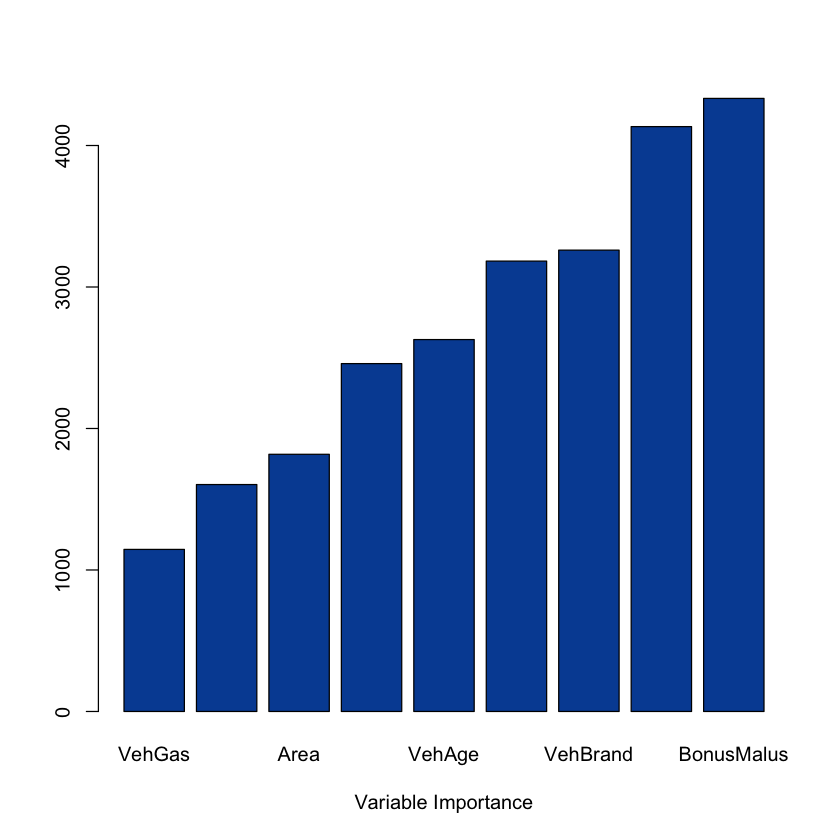

In [87]:
barplot(sort(rf_model$variable.importance), col = '#034EA2', xlab = 'Variable Importance')

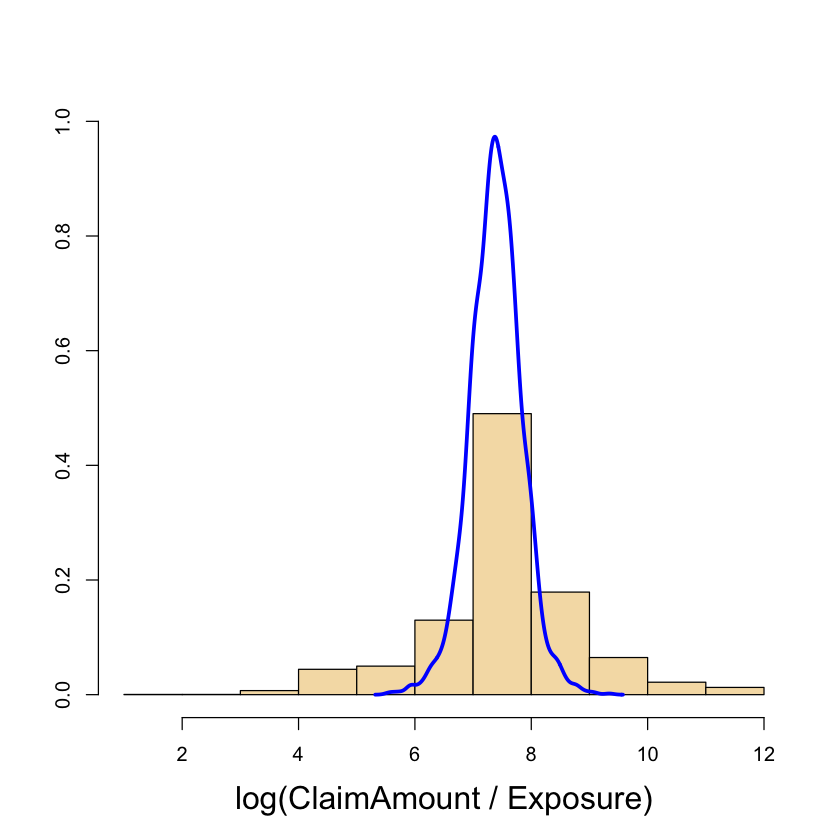

In [88]:
   rf_predictions <- exp(predict(rf_model , data=cm2_test)$predictions)
        hist(log(cm2_test$target),prob =TRUE, main = '', ylim = c(0,1) , ylab = '', col = 'wheat', xlab = 'log(ClaimAmount / Exposure)', cex.lab = 1.6)
        lines(density(log(rf_predictions)),col = 'blue', lwd = 3)

## Computing MAE and MAPE Metrics

In [89]:
library(Metrics)

# For GLM model
glm_predictions <- predict(glmc1, newdata=cm2_test, type="response")
glm_mae <- mae(cm2_test$target, glm_predictions)
glm_mape <- mape(cm2_test$target, glm_predictions)
print(paste("GLM MAE: ", glm_mae))
print(paste("GLM MAPE: ", glm_mape))

# For Random Forest model
rf_predictions <- exp(predict(rf_model , data=cm2_test)$predictions)
rf_mae <- mae(cm2_test$target, rf_predictions)
rf_mape <- mape(cm2_test$target, rf_predictions)
print(paste("Random Forest MAE: ", rf_mae))
print(paste("Random Forest MAPE: ", rf_mape))

[1] "GLM MAE:  5176.43102925024"
[1] "GLM MAPE:  6.47397445592347"
[1] "Random Forest MAE:  3803.70997644723"
[1] "Random Forest MAPE:  2.023535653759"


# 6. Combining Stages 1 and 2

In [90]:
        # Winner Model Stage 1: Poisson Regressor (glm2)
        # Winner Model Stage 2 : Random Forest Regressor (rf_forest)

        cm2_preds_stage2_valid <- exp(predict(rf_model, data = cm2_valid)$predictions)

        # now we apply the stage 1 model here
        cm2_preds_stage1_valid <- predict(glm2, newdata=cm2_valid, type="response")


        totPredExp <- cm2_preds_stage1_valid*cm2_preds_stage2_valid
        print(sum(totPredExp))
        totExp_Real <- sum(cm2_valid$sumClaims)
        print(sum(totExp_Real))

        # We will just apply it now to the whole validation basis

        m2_stage1 <- predict(glm2, newdata = m2_valid, type = 'response')
        m2_stage2 <- exp(predict(rf_model, data = m2_valid)$predictions)

        m2_valid$final_pred <-  m2_stage1 * m2_stage2
        summary(m2_valid$final_pred)


[1] 378045.6
[1] 5316921


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0429   27.0789   69.2904   96.1132  125.3350 2303.4572 

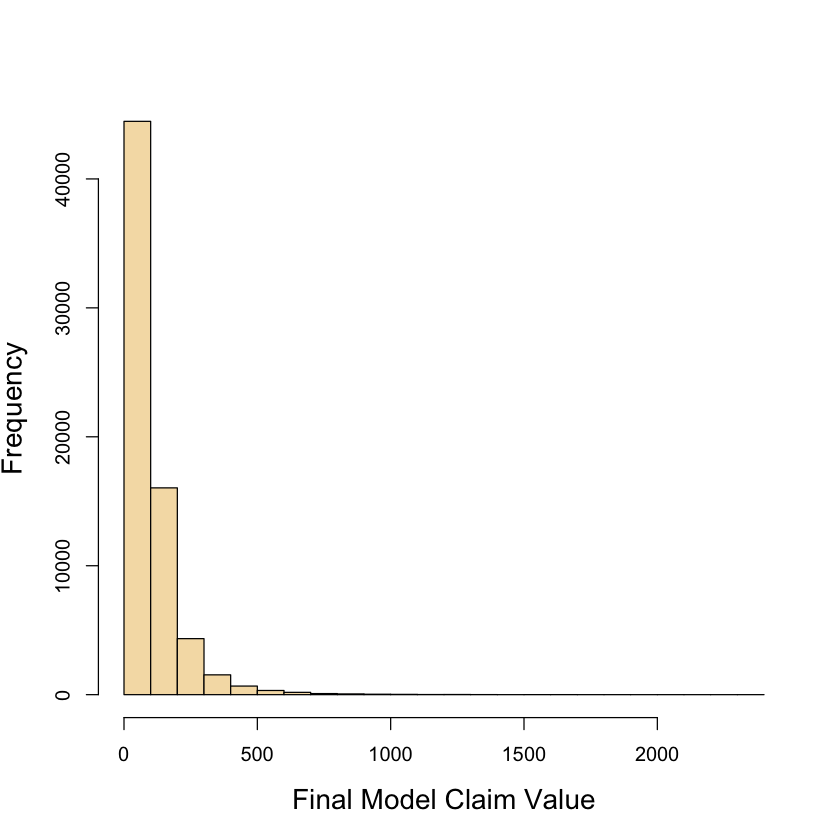

In [91]:
hist(m2_valid$final_pred, col = 'wheat', main = '', xlab = 'Final Model Claim Value', cex.lab = 1.4)

# 7. Final Evaluation of Combined Model Stages



In [102]:
        # We would like to compare total Claims on Validation
        # versus total Claims predicted by our Model

        # One challenge is that
        # for 37% of Claims there is no SumClaims! So our SumClaims is underestimated...
        # Let's to do some simple imputation
        # We will calculate mean Claim pro Claim im valid, and extrapolate it to the missing
        # claims
        sum(m2_valid$ClaimNb > 0)
        # [1] 3368
        sum(!is.na(m2_valid$sumClaims))
        # [1] 2436
        #So we need to extrapolate sumClaims for around 1000 contracts (932)

        #we can use cm2_valid for that
        mean_sumClaim_per_claim <- mean(cm2_valid$AvgClaims)
        print(paste('AvgClaim per Claim ',mean_sumClaim_per_claim))

        # now back to m2_valid
        m2_valid$impsumClaim <- m2_valid$ClaimNb*mean_sumClaim_per_claim

        # Now we just replace sumClaim with impsumClaim, if sumClaim is na

        m2_valid$sumClaims.ext <- ifelse(is.na(m2_valid$sumClaims), m2_valid$impsumClaim, m2_valid$sumClaims)

        # Now we can compare the total amount of Claims in Validation
        # with what our compuded model Stage1 * Stage2 would have predicted:

        print(paste('Sum of claims final model: ', sum(m2_valid$final_pred)))
        print(paste('Extrapoled sum Of claims :', sum(m2_valid$sumClaims.ext)))

        # Naive Counterfactual
        # We just assume 5% of the contracts in m2_valid will have a Claim, as it was 5% in the train set
        # then we just use the avg of AvgClaim value in train set as a reference and assume this a predicted Claim for
        # every claim and divide across the board
        print(paste('Mean Avg Claim Naive (train)',mean(m2_train$AvgClaims, na.rm = TRUE)))
        print(paste('Number of contracts in valid',  dim(m2_valid)[1]))
        print(paste('Naive Exposure (valid)', dim(m2_valid)[1] * 0.05 * mean(m2_train$AvgClaims,na.rm = TRUE)))



[1] 3368

[1] 2436

[1] "AvgClaim per Claim  1517.12733225108"
[1] "Sum of claims final model:  6516666.01775072"
[1] "Extrapoled sum Of claims : 6794603.27161255"
[1] "Mean Avg Claim Naive (train) 1546.8695343763"
[1] "Number of contracts in valid 67802"
[1] "Naive Exposure (valid) 5244042.40848911"


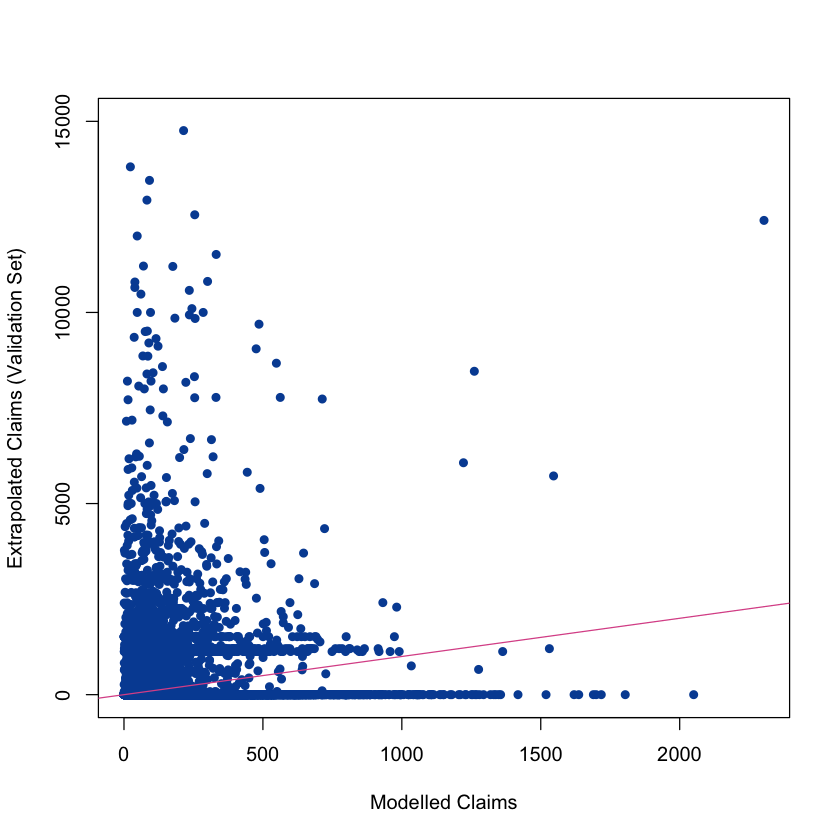

In [101]:
plot(m2_valid$sumClaims.ext ~m2_valid$final_pred, pch = 16, col = '#034EA2'
                ,xlab = 'Modelled Claims', ylab = 'Extrapolated Claims (Validation Set)', ylim = c(0,15000))
    
abline(0,1, col = '#DC5797')

## Relevant Features in the Model

Checking the effect of variables we saw in EDA that had an effect on our target.

Here we can see on the zig-zagging in the Bonus Malus probably an effect of the tree model we used (rf).

Also interesting how the model captured well on the validation set as well the young-driver Age effect (18-25).

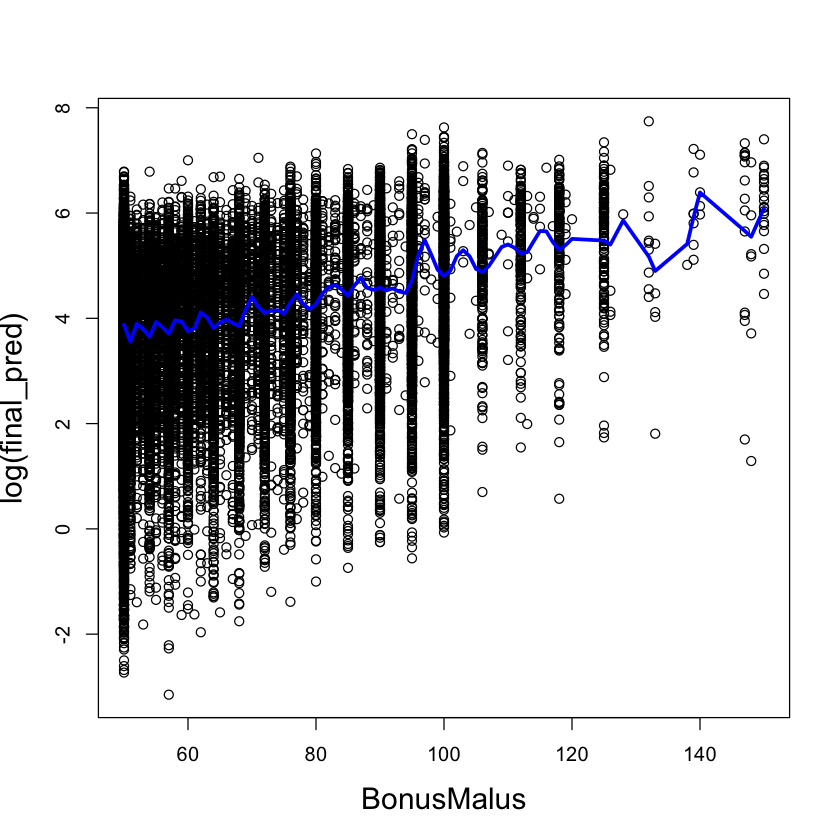

In [98]:
plot(log(m2_valid$final_pred) ~ m2_valid$BonusMalus, cex.lab = 1.5, ylab = 'log(final_pred)', xlab = 'BonusMalus')
spl1 <- smooth.spline(m2_valid$BonusMalus, log(m2_valid$final_pred))
lines(spl1, col = 'blue', lwd = 3)

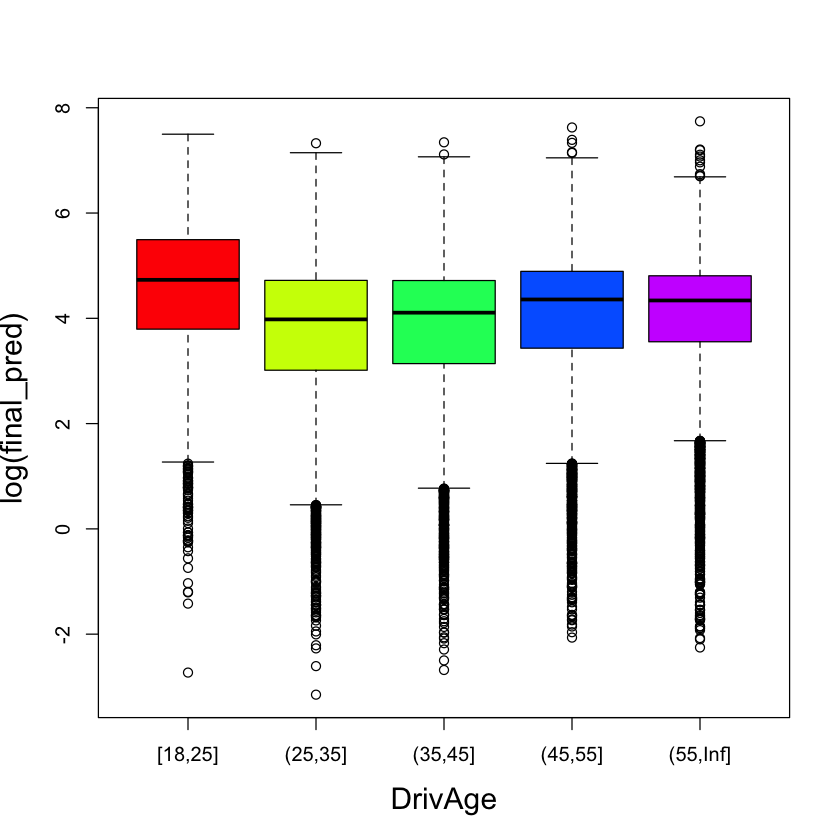

In [99]:
boxplot(log(m2_valid$final_pred) ~ m2_valid$DrivAge,  ylab = 'log(final_pred)', xlab = 'DrivAge', col = rainbow(5), cex.lab = 1.5)